# Exploring Dandiset 001354: Hippocampal Neuronal Responses to Programmable Antigen-Gated GPCR Activation

*Notebook generated with the assistance of AI. Please be cautious in interpreting the code and results below, and always validate outputs for your research needs.*

## Overview

This notebook introduces [Dandiset 001354 (Version 0.250312.0036)](https://dandiarchive.org/dandiset/001354/0.250312.0036), entitled **"Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation"**.

This dataset contains single cell electrophysiological recordings from mouse hippocampal CA1 neurons, captured in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). The primary experimental aim is to validate the use of programmable antigen-gated GPCRs to allow targeted modulation of neuronal activity.

The data are provided in the [Neurodata Without Borders (NWB)](https://www.nwb.org/) format, including per-cell voltage responses under various current clamp protocols, with metadata on cell identity and experimental context.

## What This Notebook Covers

* Brief summary of Dandiset 001354 and its experimental focus.
* Guidance on accessing and inspecting data assets with the DANDI API.
* Code for remote streaming and inspection of NWB files.
* Visualization of key electrophysiology data such as:
    * Current clamp response traces to ramp stimuli
    * Associated stimulus profiles
* Explanation of how the data is organized within the NWB structure.

By the end of this notebook, you should feel confident how to:
* List and select datasets in this Dandiset programmatically
* Load NWB-format intracellular electrophysiology data by streaming
* Visualize raw and stimulus data for one or more cells
* Understand the mapping between metadata and data arrays

## Required Python Packages

This notebook requires the following packages (assumed pre-installed):

* `dandi` — for DANDI Archive API queries
* `remfile` — for remote file streaming
* `h5py` — for HDF5/NWB file access from remote streams
* `pynwb` — for NWB format parsing
* `matplotlib` — for data visualization
* `numpy` — for numerical processing

If any are missing, please install them using your package manager before running.

## 1. Explore Available Data Assets with the DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient

# Initialize API client and select the Dandiset/version of interest
dandiset_id = "001354"
dandiset_version = "0.250312.0036"
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List a few assets in the Dandiset (limit for display)
print(f"Listing a subset of files available in Dandiset {dandiset_id}:")
for i, asset in enumerate(dandiset.get_assets()):
    print("-", asset.path)
    if i >= 9:  # Display up to 10 files
        print("...")
        break

Listing a subset of files available in Dandiset 001354:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb
- sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb
- sub-PK-110/sub-PK-110_ses-20240723T195515_slice-2024-07-23-0017_cell-2024-07-23-0017_icephys.nwb
- sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb
- sub-PK-110/sub-PK-110_ses-20240723T185020_slice-2024-07-23-0014_cell-2024-07-23-0014_icephys.nwb
- sub-PK-110/sub-PK-110_ses-20240723T160020_slice-202

The Dandiset consists of NWB files for multiple cells (e.g., PK-109, PK-110) and sessions.
Each NWB file contains intracellular recordings, metadata, stimulus, and response traces for a single cell.

## 2. Selecting & Streaming an NWB File for Inspection

We demonstrate with one file (`sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb`), representing a single cell from mouse PK-109.

Data is streamed directly from the DANDI Archive using `remfile` and opened with `h5py` and `pynwb`, so the file is not fully downloaded.

In [2]:
import remfile
import h5py
import pynwb

# Choose a file of interest (demonstration — you can change this to any in the dandiset)
nwb_relative_path = "sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb"

# Get the download URL for remote streaming
asset = next(dandiset.get_assets_by_glob(nwb_relative_path))
nwb_url = asset.download_url

# Stream open the file using remfile, and load into pynwb via h5py
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"NWBFile identifier: {nwb.identifier}")
print(f"Session start: {nwb.session_start_time}")
print(f"Subject: {nwb.subject.subject_id}, Species: {nwb.subject.species}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWBFile identifier: pk2024_07_17_0009
Session start: 2024-07-17 18:07:19-07:00
Subject: PK-109, Species: Mus musculus


## 3. Inspecting the NWB File Structure

In [3]:
# Print summary fields to show what data is available
print("Available acquisition (response) series:")
print(list(nwb.acquisition.keys())[:10], "...")

print("\nAvailable stimulus series:")
print(list(nwb.stimulus.keys())[:10], "...")

print("\nNumber of current clamp response traces:", len(nwb.acquisition))
print("Number of stimulus traces:", len(nwb.stimulus))

# Show subject and cell metadata
subject = nwb.subject
print("\nSubject info:")
print("  subject_id:", subject.subject_id)
print("  age (reference):", getattr(subject, "age__reference", None))
print("  sex:", subject.sex)
print("  date_of_birth:", getattr(subject, "date_of_birth", None))

cell_md = nwb.lab_meta_data["DandiIcephysMetadata"]
print("\nCell metadata:")
print("  targeted_layer:", cell_md.targeted_layer)
print("  cell_id:", cell_md.cell_id)
print("  slice_id:", cell_md.slice_id)

Available acquisition (response) series:
['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0', 'current_clamp-response-03-ch-1', 'current_clamp-response-04-ch-0', 'current_clamp-response-04-ch-1', 'current_clamp-response-05-ch-0', 'current_clamp-response-05-ch-1'] ...

Available stimulus series:
['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0', 'stimulus-03-ch-1', 'stimulus-04-ch-0', 'stimulus-04-ch-1', 'stimulus-05-ch-0', 'stimulus-05-ch-1'] ...

Number of current clamp response traces: 624
Number of stimulus traces: 624

Subject info:
  subject_id: PK-109
  age (reference): birth
  sex: F
  date_of_birth: 2024-04-07 00:00:00-07:00

Cell metadata:
  targeted_layer: CA1
  cell_id: 2024_07_17_0009
  slice_id: 2024_07_17_0009


The structure contains many stimulus/response pairs (numbered sequentially). Each pair shares a time base and is recorded at 20 kHz. 

The **acquisition group** holds the response traces (typically membrane potential, in volts), and **stimulus group** holds the input current (in amperes) delivered.

## 4. Visualizing a Single Stimulus-Response Pair

We'll examine the first ramp stimulus/response pair: `stimulus-01-ch-0` and `current_clamp-response-01-ch-0`.

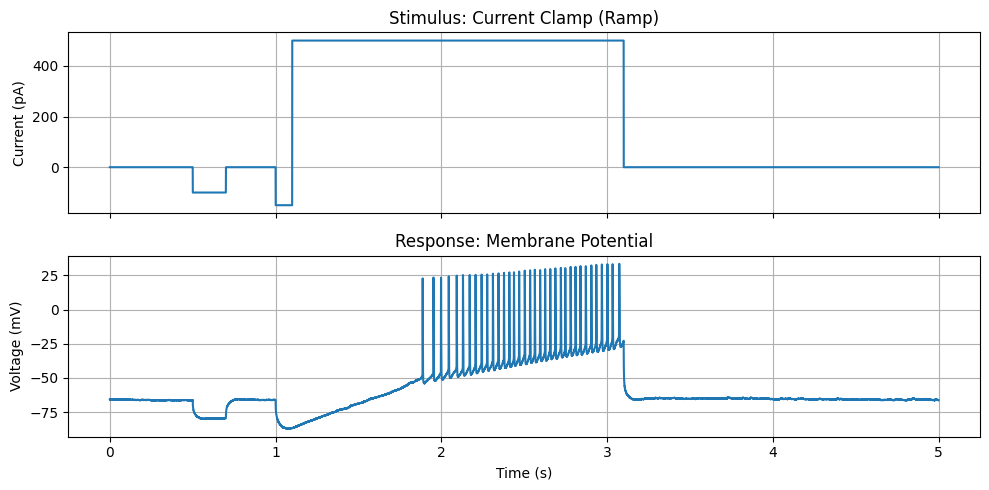

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a channel (e.g., electrode 0, trial 1)
resp = nwb.acquisition["current_clamp-response-01-ch-0"]
stim = nwb.stimulus["stimulus-01-ch-0"]

# Get conversion factor and data
# Note: resp.data is int16, use conversion for volts; stim.data is float64 pA, conversion for amperes
resp_data = resp.data[:].astype(np.float64) * resp.conversion
stim_data = stim.data[:].astype(np.float64) * stim.conversion
fs = resp.rate  # Sampling frequency (Hz)
t = np.arange(resp_data.size) / fs + resp.starting_time  # Time axis (seconds)

# Plot traces
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5))
ax1.plot(t, stim_data * 1e12)  # Display in pA for clarity
ax1.set_ylabel("Current (pA)")
ax1.set_title("Stimulus: Current Clamp (Ramp)")
ax1.grid(True)

ax2.plot(t, resp_data * 1e3)  # Display in mV for clarity
ax2.set_ylabel("Voltage (mV)")
ax2.set_xlabel("Time (s)")
ax2.set_title("Response: Membrane Potential")
ax2.grid(True)
plt.tight_layout()
plt.show()

**Explanation:**
- Top: the injected current ramp (in pA) delivered to the cell.
- Bottom: the measured membrane voltage response (in mV).

Both traces are shown for the same duration and sample count; this facilitates comparison of how the neuron responds to input currents.

## 5. Exploring Multiple Trials

Typically, NWB files in this Dandiset contain >600 pairs of stimulus/response traces, often involving different currents or trial types (but here all labeled as `ramp`). Let's view several consecutive stimulus-response pairs to get a sense of response consistency.

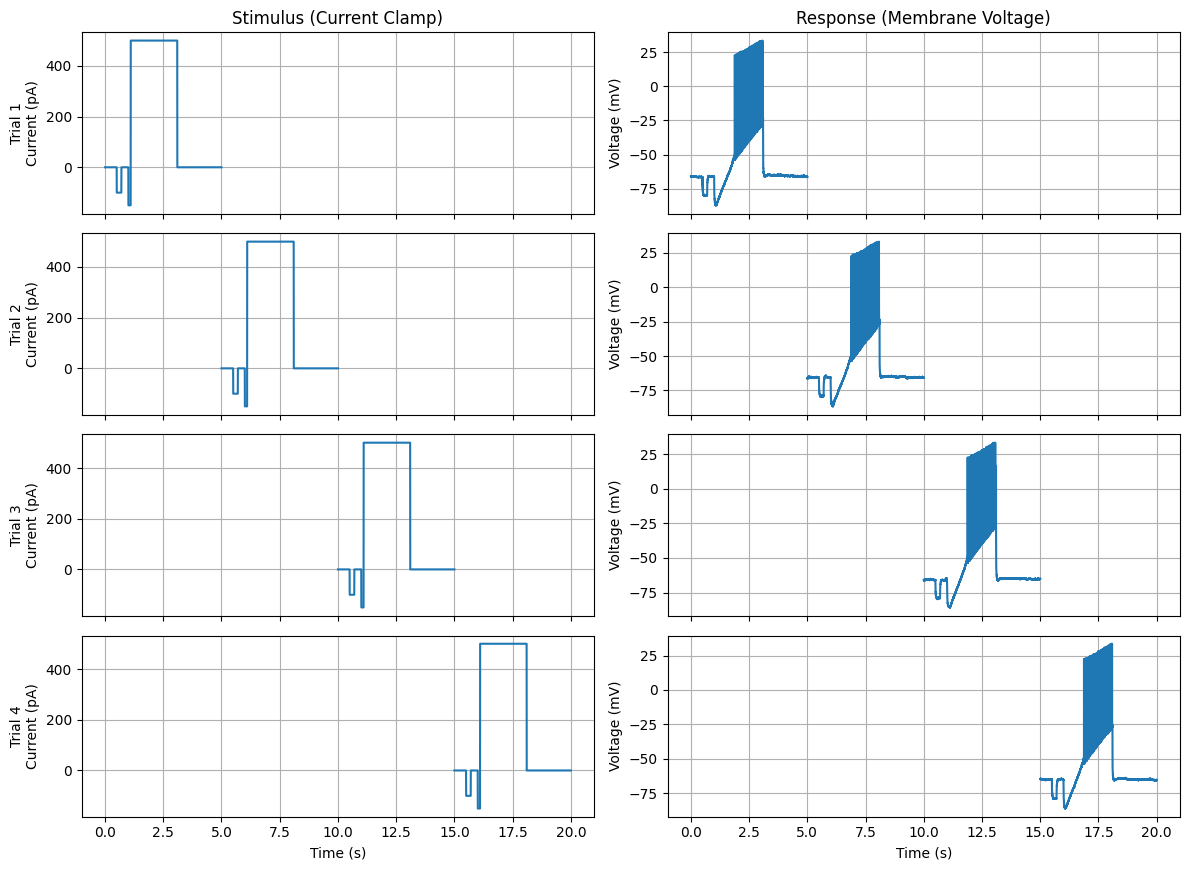

In [5]:
num_trials = 4  # Number of consecutive ramp trials to display

fig, axs = plt.subplots(num_trials, 2, figsize=(12, num_trials * 2.2), sharex=True)
for trial in range(1, num_trials + 1):
    resp_key = f"current_clamp-response-{trial:02d}-ch-0"
    stim_key = f"stimulus-{trial:02d}-ch-0"
    resp = nwb.acquisition[resp_key]
    stim = nwb.stimulus[stim_key]
    stim_data = stim.data[:] * stim.conversion
    resp_data = resp.data[:] * resp.conversion
    t = np.arange(resp_data.size) / fs + resp.starting_time
    
    axs[trial-1, 0].plot(t, stim_data * 1e12)
    axs[trial-1, 0].set_ylabel(f"Trial {trial}\nCurrent (pA)")
    axs[trial-1, 0].grid(True)
    axs[trial-1, 1].plot(t, resp_data * 1e3)
    axs[trial-1, 1].set_ylabel("Voltage (mV)")
    axs[trial-1, 1].grid(True)
    if trial == num_trials:
        axs[trial-1, 1].set_xlabel("Time (s)")
        axs[trial-1, 0].set_xlabel("Time (s)")
axs[0,0].set_title("Stimulus (Current Clamp)")
axs[0,1].set_title("Response (Membrane Voltage)")
plt.tight_layout()
plt.show()

**Note:** The traces above illustrate stimulus and response for four consecutive trials from the same cell. The ramp shape and duration are highly reproducible, but cellular responses may evolve over time, reflecting changes in cell state or pharmacology.

## 6. Understanding the Electrophysiological Metadata

The NWB file contains additional tables for grouping and organizing the stim/resp recordings:
* `intracellular_recordings` table
* `icephys_simultaneous_recordings` table
* `icephys_sequential_recordings` table

Let's briefly inspect the structure of these tables.

In [6]:
print("intracellular_recordings: rows =", len(nwb.intracellular_recordings.id))
print("icephys_simultaneous_recordings: rows =", len(nwb.icephys_simultaneous_recordings.id))
print("icephys_sequential_recordings: rows =", len(nwb.icephys_sequential_recordings.id))
print("Columns in sequential_recordings:", nwb.icephys_sequential_recordings.colnames)

intracellular_recordings: rows = 624
icephys_simultaneous_recordings: rows = 312
icephys_sequential_recordings: rows = 1
Columns in sequential_recordings: ('simultaneous_recordings', 'stimulus_type')


Although we do not further analyze these tables here, they are useful if you want to relate different trials, groupings, or stimulus types across experiments.

## 7. What Next? Custom Analysis Ideas

This notebook serves as a template for exploring Dandiset 001354. You can adapt it to:

* Compare responses across cells, or between different experimental groups/sessions
* Examine effects of various antigens or drugs (by cross-referencing file-level or Dandiset-level metadata)
* Quantify properties such as input resistance, spike threshold, and firing rate from the traces
* Automatically batch process and plot across all files in the Dandiset for reproducibility

See full protocol and experimental details at [the related publication](https://www.nature.com/articles/s41586-024-08282-3).

## Summary

* **Dandiset 001354** contains rich single-cell electrophysiology data for antigen-gated programmable GPCR activation in mouse hippocampal CA1.
* NWB files are well-structured for automated and manual exploration.
* Streaming access allows for inspection and visualization without full downloads.
* This notebook can be expanded for your own analyses; use and cite responsibly!